In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv('./data/ds_salaries.csv')

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Determine Number of rows and columns in the dataset

In [3]:
# Number of rows and columns in the input dataset
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f'The input file has {num_rows} rows and {num_cols} columns')

The input file has 607 rows and 12 columns


In [4]:
# Columns of the input dataset
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

# Determine columns having no missing values
From the results below, we infer that all columns have no missing values.

In [5]:
# Determine the list of no missing value columns
no_null_cols = set(df.columns[df.isnull().mean()==0])

no_null_cols

{'Unnamed: 0',
 'company_location',
 'company_size',
 'employee_residence',
 'employment_type',
 'experience_level',
 'job_title',
 'remote_ratio',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'work_year'}

In [6]:
# This is another way of checking which columns have missing values. We find below that
# all coluns are not null, and therefore does not contain any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


# Closer Look at numerical columns

In [7]:
# Construct a dataframe of all numeric columns 
num_df = df[['work_year', 'remote_ratio', 'salary', 'salary_in_usd']]

num_df.head()

,work_year,remote_ratio,salary,salary_in_usd
0,2020,0,70000,79833
1,2020,0,260000,260000
2,2020,50,85000,109024
3,2020,0,20000,20000
4,2020,50,150000,150000


In [8]:
# Get descriptive statistics of nthese umerical columns
num_df.describe()

,work_year,remote_ratio,salary,salary_in_usd
count,607.000000,607.00000,6.070000e+02,607.000000
mean,2021.405272,70.92257,3.240001e+05,112297.869852
std,0.692133,40.70913,1.544357e+06,70957.259411
min,2020.000000,0.00000,4.000000e+03,2859.000000
25%,2021.000000,50.00000,7.000000e+04,62726.000000
50%,2022.000000,100.00000,1.150000e+05,101570.000000
75%,2022.000000,100.00000,1.650000e+05,150000.000000
max,2022.000000,100.00000,3.040000e+07,600000.000000


In [9]:
# Proportion of not null values in target column - salary_in_usd
prop_sals = 1 - num_df['salary_in_usd'].isnull().mean()

prop_sals

1.0

In [10]:
# Remove rows with missing salary_in_usd values
# Helpful if we receive missing target (i.e., salary_in_usd) values in the future
sal_rm_df = num_df.dropna(subset=['salary_in_usd'])

sal_rm_df.shape

(607, 4)

In [11]:
# Remove rows with missing input column values
# Helpful if we receive missing numerical input values in the future
all_rm_df = sal_rm_df.dropna()

all_rm_df.shape

(607, 4)

In [12]:
# After this analysis we determine that all 607 rows of the input data are retained.

# Exploratory Analysis of numerical columns

## Bar Plot for Work Year
The year for which the salary was paid.

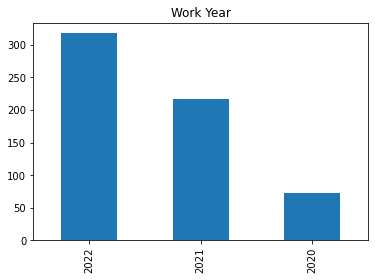

In [13]:
# Calculate value frequency and draw bar plot
work_year_vals = df.work_year.value_counts()

work_year_vals.plot(kind='bar');
plt.title('Work Year');

## Bar Plot for Remote Ratio
A classification of overall amount of work done remotely. possible values are: 
- 0   - No remote work (less than 20%)
- 50  - Partially remote 
- 100 - Fully remote (more than 80%)

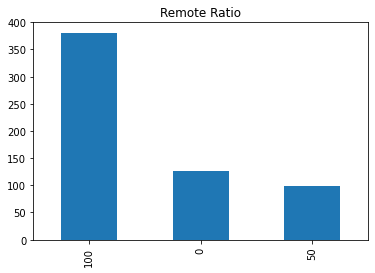

In [14]:
# Calculate value frequency and draw bar plot
remote_ratio_vals = df.remote_ratio.value_counts()

remote_ratio_vals.plot(kind='bar');
plt.title('Remote Ratio');

## Box Plot for Salary in Local Currency
Total amount of gross salary paid in local currency. 

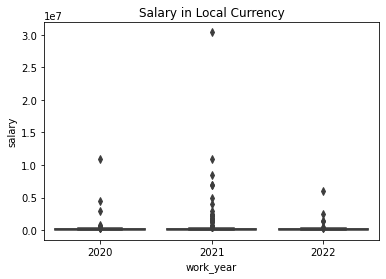

In [15]:
# Calculate value frequency and draw bar plot
sns.boxplot(x=df['work_year'], y=df['salary']);
plt.title('Salary in Local Currency');

## Box Plot for Salary in USD
Total gross salary in local currency converted to amount in USD.

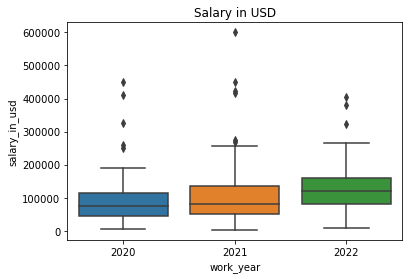

In [16]:
# Calculate value frequency and draw bar plot
sns.boxplot(x=df['work_year'], y=df['salary_in_usd']);
plt.title('Salary in USD');

# Exploratary Analysis of catagorical columns
Following are the catagorical columns of this dataset:
 -   experience_level
 -   employment_type
 -   job_title
 -   salary_currency
 -   employee_residence
 -  company_location
 -  company_size

## Bar plot for Experience Level
The experience level of the job during the work year. Possible values are: 
- EN - Entry-level / Junior 
- MI - Mid-level / Intermediate 
- SE - Senior-level / Expert 
- EX - Executive-level / Director

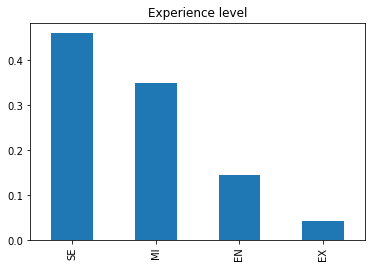

In [17]:
# Calculate value frequency and draw bar plot
experience_level_vals = df.experience_level.value_counts()

(experience_level_vals/num_rows).plot(kind='bar');
plt.title('Experience level');

## Bar plot for Employment Type
The type of employement of the employee. Possible values are: 
- PT - Part-time 
- FT - Full-time 
- CT - Contract 
- FL - Freelance

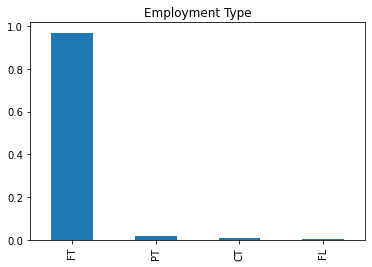

In [18]:
# Calculate value frequency and draw bar plot
employment_type_vals = df.employment_type.value_counts()

(employment_type_vals/num_rows).plot(kind='bar');
plt.title('Employment Type');

## Bar plot for Job Title
The role worked in during the year.

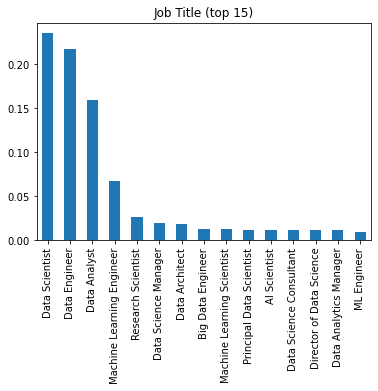

In [19]:
# Calculate value frequency and draw bar plot
job_title_vals = df.job_title.value_counts()[:15]

(job_title_vals/num_rows).plot(kind='bar');
plt.title('Job Title (top 15)');

## Bar plot for Salary Currency
The currency in which the salary paid. It is an ISO 3 character currency code.

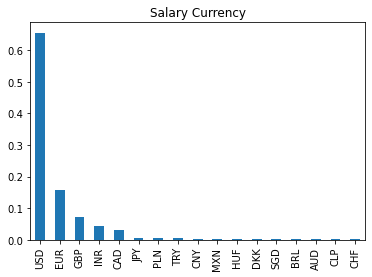

In [20]:
# Calculate value frequency and draw bar plot
salary_currency_vals = df.salary_currency.value_counts()

(salary_currency_vals/num_rows).plot(kind='bar');
plt.title('Salary Currency');

## Bar plot for Employee Residence Country
Employee's primary country of residence. It is an ISO 2 character country code.

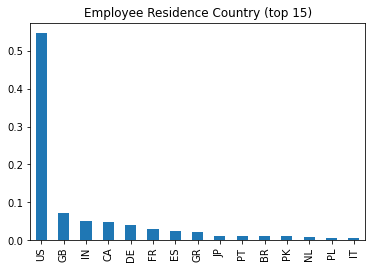

In [21]:
# Calculate value frequency and draw bar plot
employee_residence_vals = df.employee_residence.value_counts()[:15]

(employee_residence_vals/num_rows).plot(kind='bar');
plt.title('Employee Residence Country (top 15)');

## Bar plot for Company Location Country
The country where employer's main office or contracting branch is located. It is an ISO two character country code.

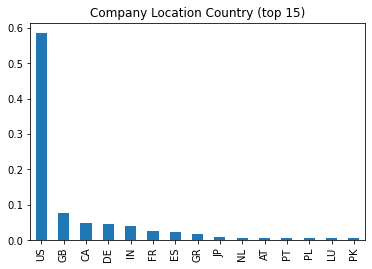

In [22]:
# Calculate value frequency and draw bar plot
company_location_vals = df.company_location.value_counts()[:15]

(company_location_vals/num_rows).plot(kind='bar');
plt.title('Company Location Country (top 15)');

## Bar plot for Company Size
The average number of people that worked for the company during the year of salary payment. Possible values are: 
- S - less than 50 employees (small) 
- M - 50 to 250 employees (medium) 
- L - more than 250 employees (large)

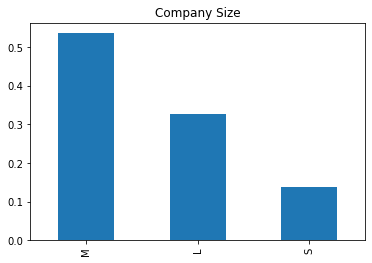

In [23]:
# Calculate value frequency and draw bar plot
company_size_vals = df.company_size.value_counts()

(company_size_vals/num_rows).plot(kind='bar');
plt.title('Company Size');

In [24]:
# End of Exploratory Analysis